In [1]:
import mat73
import os
data_root  = r"C:\Users\Alireza\OneDrive - Harvard University\Documents\cosine_preprocess_data"
mat_data =mat73.loadmat(os.path.join(data_root,"diffnrent_mesure_of_improvment.mat"))

In [12]:
import pandas as pd

 



dict_keys(['array_list', 'delta_resp_cell', 'exp_id', 'gen_score_cell', 'init_r2_mat', 'last_r2_mat', 'lm_pVal_cell', 'lm_slope_cell', 'lm_slope_mean_mat', 'masks_cell', 'sampling_mode_cell', 'score_mode_cell', 'thread_id', 'use_resp_flag'])

In [94]:
# get each arrag in the lm_slove cell and mask it with the mask_cell[i][1] and concatenate them do the same for the delra_resp_cell
lm_slove_cell = mat_data['lm_slope_cell']
mask_cell = mat_data['masks_cell']
delta_resp_cell = mat_data['delta_resp_cell']
for i in range(len(lm_slove_cell)):
    mask = mask_cell[i][0][0][0] == True
    lm_slove = lm_slove_cell[][mask]
    delta_resp = delta_resp_cell[i][0][0][0][mask]
#concatenate the lm_slove_cell



TypeError: only integer scalar arrays can be converted to a scalar index

In [99]:
# find the index in the mask = mask.astype(int) that is 1
mask = mask.astype(int)
mask = mask.flatten()
mask 


array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0])

In [92]:
# find the idx of the mask_cell[i][0][0][0] == True


array([False,  True,  True, False,  True, False, False,  True, False,
       False,  True,  True, False,  True, False, False,  True, False,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False,  True,  True, False, False,  True,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True, False, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False,  True,  True, False,  True,  True, False,  True,
       False, False,

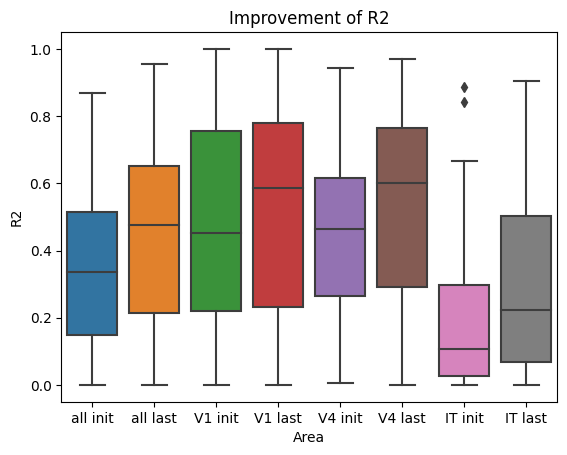

,p_val
all,NaN
V1,NaN
V4,NaN
IT,NaN


In [65]:
# make a BOX  plot of the data in each colomn of last_r2_mat
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
last_r2_mat = mat_data['last_r2_mat']
last_r2_mat = np.array(last_r2_mat)
last_r2_mat = pd.DataFrame(last_r2_mat)
init_r2_mat = mat_data['init_r2_mat']
init_r2_mat = np.array(init_r2_mat)
init_r2_mat = pd.DataFrame(init_r2_mat)
# now make a df that col 1 is col 1 of init_r2_mat and col 2 is col 1 of last_r2_mat and so on
df_concat = pd.DataFrame()
for i in range(init_r2_mat.shape[1]):
    df_concat = pd.concat([df_concat,init_r2_mat.iloc[:,i],last_r2_mat.iloc[:,i]],axis=1, ignore_index=True)
# make BOX plot
df_concat.columns = ['all init','all last','V1 init','V1 last','V4 init','V4 last','IT init','IT last']
# make first two box same color and the next two same color and so on
# Create a boxplot
sns.boxplot(data=df_concat)
# add title
plt.title('Improvement of R2')
# add x label
plt.xlabel('Area')
# add y label
plt.ylabel('R2')
plt.show()
# run the sign test on the data between the columns of init_r2_mat and last_r2_mat
from scipy.stats import wilcoxon
p_val = []
for i in range(init_r2_mat.shape[1]):
    # remvoe the nans
    
    p_val.append(wilcoxon(init_r2_mat.iloc[:,i],last_r2_mat.iloc[:,i]).pvalue)
p_val = pd.DataFrame(p_val)
p_val.columns = ['p_val']
p_val.index = ['all','V1','V4','IT']
p_val 


In [32]:
last_r2_mat = last_r2_mat.melt(var_name='columns', value_name='values')
# do the same for the init_r2_mat
init_r2_mat = mat_data['init_r2_mat']
init_r2_mat = np.array(init_r2_mat)
init_r2_mat = pd.DataFrame(init_r2_mat)
init_r2_mat = init_r2_mat.melt(var_name='columns', value_name='values')

plt.figure(figsize=(10,6))
sns.violinplot(x='columns', y='values', data=last_r2_mat)
plt.show()


,columns,values
0,0,0.216425
1,0,0.407254
2,0,0.393328
3,0,0.123028
4,0,0.613595
...,...,...
411,3,0.112746
412,3,0.000398
413,3,0.405511
414,3,NaN


In [15]:
last_r2_mat.columns = ["r2_1","r2_2","r2_3","r2_4","r2_5","r2_6","r2_7","r2_8","r2_9","r2_10"]
last_r2_mat = last_r2_mat.melt(var_name='columns', value_name='values')
plt.figure(figsize=(10,6))
sns.violinplot(x='columns', y='values', data=last_r2_mat)
plt.show()


ValueError: Length mismatch: Expected axis has 104 elements, new values have 10 elements